In [1]:
from dl_toolbox.utils import *
import matplotlib.pyplot as plt
import math

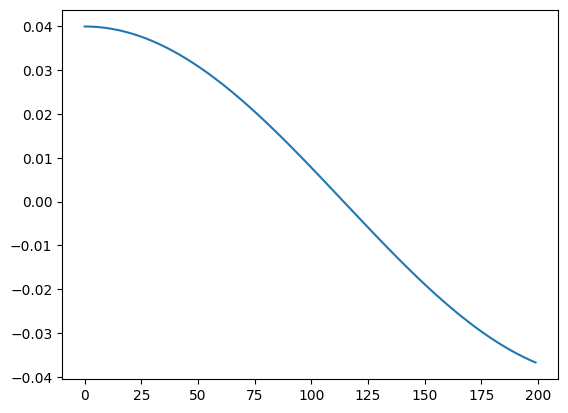

In [10]:
x = list(range(200))
y = [0.04*math.cos((7./16.)*math.pi*(i/100)) for i in x]
plt.plot(x, y)

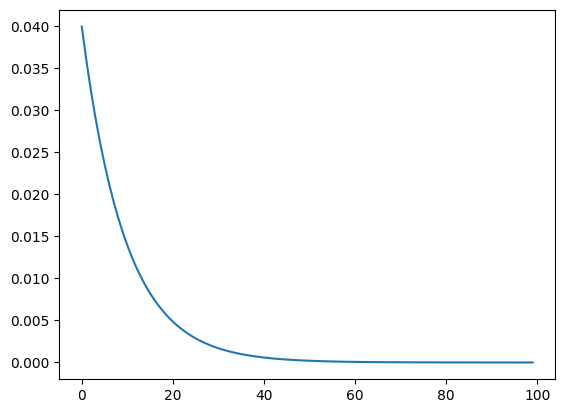

In [9]:
x = list(range(100))
y = [0.04]
for i in x[1:]:
    y.append(0.9*y[-1])
plt.plot(x, y)

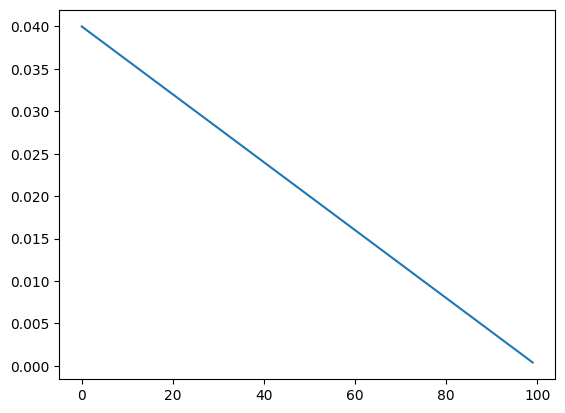

In [10]:
import numpy as np
x = list(range(100))
y = [0.04*eta for eta in np.linspace(1, 0.01, 100)]
plt.plot(x, y)

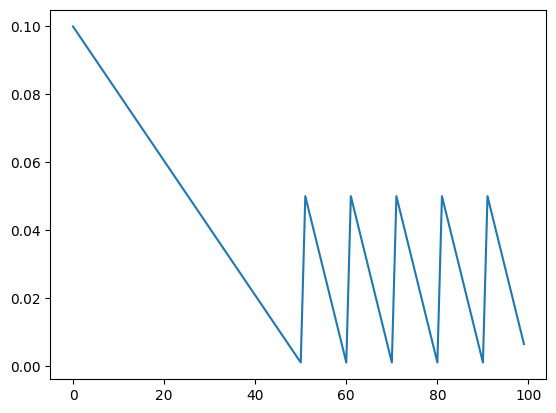

In [7]:
import matplotlib.pyplot as plt
import math
x = list(range(100))
def t(i):
    return ((i-1)%10)/(10-1)
def lr(i):
    if i<=50:
        return 0.1 + i/50 * (0.001 - 0.1)
    else:
        return (1-t(i-50))*0.05 + t(i-50) * 0.001
y = [lr(i) for i in x]
plt.plot(x, y)

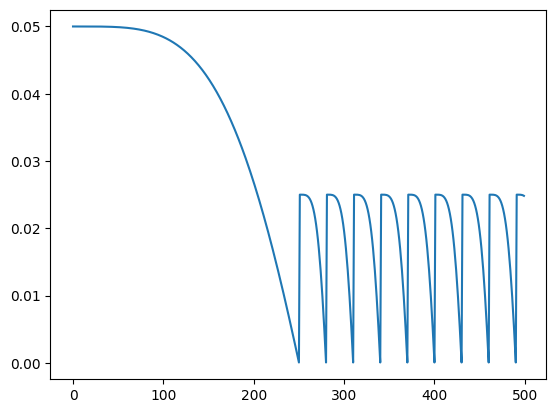

In [23]:
class swa_lr:
    def __call__(self, i):
        if i<=250:
            t = i/250
            m = math.cos(math.pi*t*t/2)
            return m * 1 + (1-m) * 0.001
        else:
            #return 0.5
            t=((i-250-1)%30)/(30-1)
            m = math.cos(math.pi*t*t/2)
            return m*0.5 + (1-m)* 0.001
x = list(range(500))
swa_lr = swa_lr()
y = [0.05*swa_lr(i) for i in x]
plt.plot(x, y)

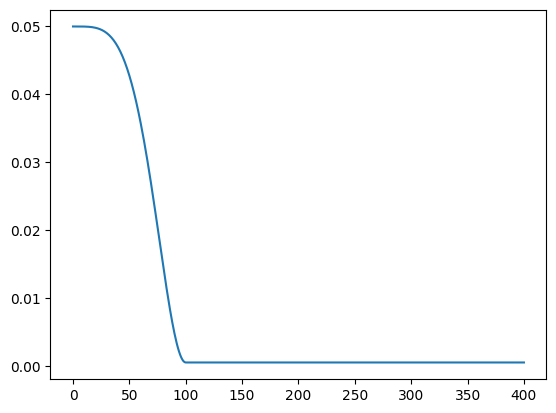

In [1]:
%load_ext autoreload
%autoreload 2  
from dl_toolbox.schedulers import SwaLR
import matplotlib.pyplot as plt
lr = SwaLR(
    start_lr=1,
    end_lr=1/100,
    start_swa=100,
    cycle_len=2,
    cycle_min=1/100,
    cycle_max=1/100,
    mode='cos2'
)
x = list(range(401))
y = [0.05*lr(i) for i in x]
plt.plot(x, y)

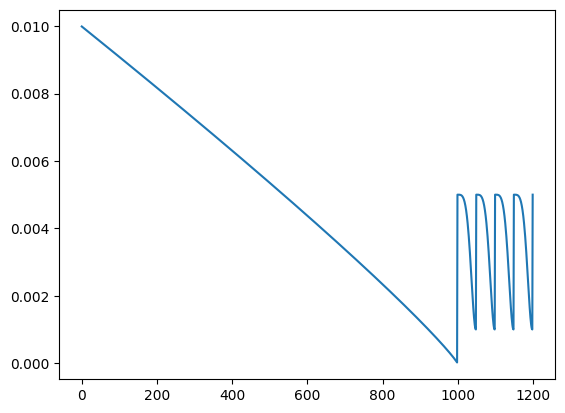

In [3]:
from torch.optim.lr_scheduler import *
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from dl_toolbox.schedulers import SwaLR

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(28*28, 512)

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear(x)
        return logits

model = NeuralNetwork().to('cpu')
sgd = torch.optim.SGD(model.parameters(), lr=0.01)
poly = PolynomialLR(sgd, power=0.9, total_iters=1000)
swa = LambdaLR(sgd, SwaLR(
    cycle_len=50,
    cycle_min=0.1,
    cycle_max=0.5,
    mode='cos2'
))
#swa = torch.optim.swa_utils.SWALR(
#    sgd, anneal_strategy="cos", anneal_epochs=50, swa_lr=0.005
#)

scheduler = SequentialLR(sgd, schedulers=[poly, swa], milestones=[1000])
lrs = []
for epoch in range(1200):
    sgd.step()
    scheduler.step()
    lrs.append(scheduler._last_lr)
x = list(range(1200))
plt.plot(x, lrs)

In [26]:
0.2**0.9

0.2349237886176038